# House Prediction Mini-Project
Dataset Kaggle: https://www.kaggle.com/datasets/shree1992/housedata/data

## Detail

อันนี้จริงๆ พวกเราอาจจะไม่ต้องเขียน แค่จะบอกเฉยๆว่า dataset มีรายละเอียดอะไรบ้าง:<br><br>
**date:** วันที่ขายบ้าน  
**price:** ราคาขายของบ้าน (ดอลลาร์สหรัฐ)  
**bedrooms:** จำนวนห้องนอน  
**bathrooms:** จำนวนห้องน้ำ  
**sqft_living:** พื้นที่ใช้สอยในบ้าน (ตารางฟุต)  
**sqft_lot:** พื้นที่ทั้งหมดของที่ดิน (ตารางฟุต)  
**floors:** จำนวนชั้นทั้งหมดของบ้าน  
**waterfront:** มีวิวติดน้ำหรือไม่ (1 = มี, 0 = ไม่มี)  
**view:** คุณภาพของวิว (0–4, ยิ่งมากยิ่งดี)  
**condition:** สภาพโดยรวมของบ้าน (1–5, ยิ่งมากยิ่งดี)  
**sqft_above:** พื้นที่ชั้นบน (ไม่รวมชั้นใต้ดิน)  
**sqft_basement:** พื้นที่ของชั้นใต้ดิน  
**yr_built:** ปีที่สร้างบ้าน  
**yr_renovated:** ปีที่ปรับปรุงบ้านล่าสุด (0 หมายถึงไม่เคยปรับปรุง)  
**street:** ที่อยู่ถนนของบ้าน  
**city:** เมืองที่ตั้งของบ้าน  
**statezip:** รัฐและรหัสไปรษณีย์  
**country:** ประเทศที่ตั้งของบ้าน  

จริงๆ โดยปกติแล้วอาจจะเขียนอธิบาย comment เป็นภาษาอังกฤษ แต่โฟล์คเลือกที่จะอธิบายไทย เผื่อพวกเรายังไม่คล่องภาษาอังกฤษนะครับ

In [1]:
# Library ที่ใช้จริงๆเขียน import ทั้งหมดข้างบนไปเลยก็ได้ แต่ที่เขียนแยกในแต่ละ cell จะดูง่ายกว่าว่า cell ไหนใช้อันไหนตอนไหนบ้าง
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.base import BaseEstimator, TransformerMixin
from joblib import dump, load

## Load dataset

In [2]:
# ตรงนี้ อย่างแรกเลยเราก็ต้องดึงตัวเดต้ามาใช้ก่อน ซึ่งก็คือไฟล์ประเภท csv ที่ย่อมาจาก Comma-Separated Values แปลว่าแต่ละค่ามันแยกกันโดยใช้คอมม่าหรือก็คือ ","
import pandas as pd
df = pd.read_csv("house_data.csv")
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


## EDA & Preparation

In [3]:
#เราประกาศตัวแปรชื่อ df แล้วเราจะใช้ method ของ pandas ที่จะดูจำนวนแถว และคอลัมน์ (feature)
df.shape

(4600, 18)

In [4]:
# ใช้ method info ดู Column data type และดูว่ามี Null value หรือเปล่า
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

จะเห็นได้ว่า feature ทั้งหมด Non-null แปลว่ามีข้อมูลหมด ไม่มีช่องว่าง(หรือเปล่า) และข้อมูล type ก็มี object แบบพวก string(ข้อความ) และตัวเลขแบบ int (จำนวนเต็ม) หรือ float (ทศนิยมอ่ะแหละจริงๆ ก็มีตัวอื่นแบบ double อยู่) เราอาจจะต้องเปลี่ยนประเภทข้อมูลบางตัวเพื่อไปใช้ต่อในภายหลัง

In [5]:
df.describe() # Check stat ต่างๆ ทั้งค่า mean std min max ของแต่ละ columns

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


จะเห็นได้ว่ามันจะมีอันที่แปลกๆ อยู่อย่างค่า min หรือค่าต่ำสุดของ Columns นั้นๆ ดันมีราคาบ้านเพียง 0 dollar ซึ่งถือว่าแปลกมากพี่ บ้านฟรี
เราอาจจะต้อง assume ไปก่อนว่าคนกรอก data ผิด คำถามคือเราจะทำเยี่ยงไรกับสถานการณ์นี้ เดี๋ยวค่อยว่ากันอีกที

In [6]:
# อันนี้พี่จะลองไล่ value_counts แต่ละ columns เผื่อได้ insight อะไร (อันที่เขียนแปะเอาไว้ใน cells อยู่คืออันที่น่าสนใจ)
df.price.value_counts()

price
0.000000         49
300000.000000    42
400000.000000    31
450000.000000    29
600000.000000    29
                 ..
264270.000000     1
602761.000000     1
251555.555556     1
214750.000000     1
258125.000000     1
Name: count, Length: 1741, dtype: int64

price เราจะเห็นได้ว่า จากที่ลองนับดู เราเห็นข้อมูลที่มีค่าเป็น 0 อยู่ 49 อัน (บ้านราคา 0 dollar) เราจะต้องทำอะไรซักอย่าง

In [7]:
df.country.value_counts()

country
USA    4600
Name: count, dtype: int64

country เราจะเห็นว่าข้อมูลทั้งหมดมันสหรัฐอเมริกาหมดเลย

In [8]:
df.floors.value_counts() # count ข้อมูลชั้น

floors
1.0    2174
2.0    1811
1.5     444
3.0     128
2.5      41
3.5       2
Name: count, dtype: int64

อิหยังคือชั้น .5!! พี่เลยไปหาเน็ตแล้วพบว่า เขาใช้เรียกพวกชั้นใต้ดิน ชั้นใต้หลังคา เพราะฉนั้น ถ้าเราจะนับเป็นอีกห้องนึงไปเลยละกัน หรือก็คือปัดขึ้นเป็นจำนวนเต็ม

In [9]:
df.bathrooms.value_counts() # count ข้อมูลห้องน้ำ

bathrooms
2.50    1189
1.00     743
1.75     629
2.00     427
2.25     419
1.50     291
2.75     276
3.00     167
3.50     162
3.25     136
3.75      37
4.50      29
4.00      23
4.25      23
0.75      17
4.75       7
5.00       6
5.25       4
5.50       4
1.25       3
0.00       2
6.25       2
5.75       1
8.00       1
6.50       1
6.75       1
Name: count, dtype: int64

เหมือนเดิม แต่คราวนี้พี่ล่อยัน .75 .25 ซึ่งหมายความว่า
- ห้องน้ำแบบ “full bathroom” คือมี sink toilet shower bathtub จัดเต็มคือ 1
- ห้องน้ำแบบ "half bathroom" คือมีแค่ฝักบัวและ sink หรืออาจจะมี toilet กับ ฝักบัว 0.5
- ห้องน้ำแบบ "three-quarter bathroom" คือไม่มีแค่อ่างอาบน้ำหรือไม่มีแผงฝักบัว 0.75
- ห้องแบบ "quarter bathroom" ก็อาจจะมีแค่ส้วมหรือ shower

เพราะฉะนั้นตัวอย่างก็แบบ 6.25 6 full และ 0.25 เป็น quarter<br>
source: https://www.archiinterio.com/magazine/what-are-fractional-bathrooms-

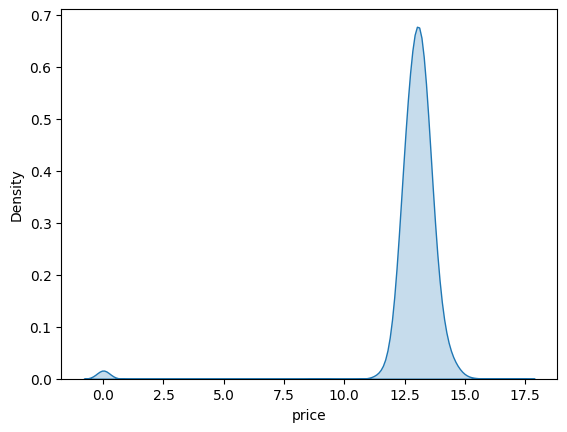

In [10]:
# Check distribution ของ price
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.kdeplot(df['price'].apply(np.log1p), fill=True)
plt.show()

จากก่อนหน้า เราจะรู้ว่ามี price อันที่ราคาเป็น 0 ส่วนตัวจะไม่ได้ลบพวกนั้นทิ้งแต่เอาค่า mean price ของคนอื่นไปใส่ค่าพวกนั้นแทน (ปล. mean ต้องไม่ไปนับค่าที่มันเป็น 0 ดังนั้นเราจะแปลงค่า 0 ให้เป็น NULL ไปก่อน)

In [11]:
# Fix price zeros
df.loc[df['price'] == 0, 'price'] = np.nan
mean_price = df["price"].mean(skipna=True)
#เอา null เปลี่ยนเป็น mean
df["price"] = df["price"].fillna(mean_price)

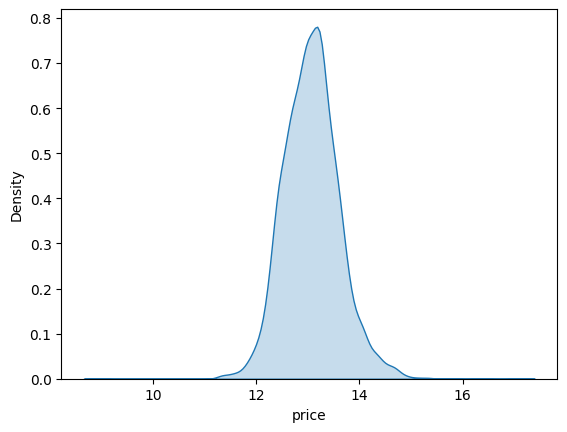

In [12]:
# Check distribution ของ price อีกรอบ
import matplotlib.pyplot as plt
import seaborn as sns
sns.kdeplot(df['price'].apply(np.log1p), fill=True)
plt.show()

แง่ง 0 หายไปแล้ววววว 

## Feature Engineering

Feature ปัจจุบัน มันมีบางอันที่เราอาจจะต้องปรับแก้ให้สามารถได้ insight จากมันได้อย่างเช่น date การขายบ้าน

In [13]:
# เปลี่ยนข้อมูลวันให้เป็น datetime
df['date']      = pd.to_datetime(df['date'], errors='coerce')
# แยกปีกับเดือนกัน
df["yr_sold"]   = df["date"].dt.year
df["month_sold"]= df["date"].dt.month
# ปีปรับปรุงบ้าน เราจะเพิ่ม 0/1 (binary) renovated เพื่อรู้ว่าได้ renovated หรือยัง กับ อายุบ้านตั้งแต่ครั้งสุดท้ายที่รีโนเวต
df["renovated"] = np.where(df["yr_renovated"] == 0, 0, 1)
df["yr_since_renovated"] = np.where(
    df["yr_renovated"].fillna(0) == 0,
    df["yr_sold"] - df["yr_built"],
    df["yr_sold"] - df["yr_renovated"]
)

เดิมเรามีแค่ date ที่เป็น string หรือ datetime ทั้งก้อน ซึ่งโมเดลอ่านไม่เข้าใจ

- yr_sold → ปีที่ขาย ใช้ดู trend ราคาบ้านตามเวลา เช่น บ้านที่ขายปีหลัง ๆ ราคาสูงกว่า
- month_sold → เดือนที่ขาย ช่วยจับ seasonality effect เช่น ฤดูร้อนอาจขายได้ดีกว่า
สรุป: เพิ่มความสามารถให้โมเดลเข้าใจ “เวลา” และ “ฤดูกาล” ในตลาดอสังหา

ฟีเจอร์ yr_renovated แค่บอก “ปีรีโนเวต” ซึ่งไม่ตีความได้ตรง ๆ

- renovated → flag (0/1) บอกว่าบ้านนี้เคยรีโนเวตไหม
- yr_since_renovated → อายุบ้านตั้งแต่ครั้งสุดท้ายที่รีโนเวต (หรือสร้างถ้าไม่เคยรีโนเวต)

สรุป: โมเดลเข้าใจ “สภาพความใหม่ของบ้าน” มากขึ้น ไม่ได้ดูแค่ปีที่สร้าง


In [14]:
# zip จาก statezip (เช่น "WA 98103")
df["zip"] = df["statezip"].str.split().str[-1].astype("int64", errors="ignore")

**Insight เดิม:** statezip เป็นข้อความ เช่น “WA 98103” โมเดลใช้ไม่ได้โดยตรง

**สิ่งที่เพิ่มขึ้น:**

ได้ zip ซึ่งเป็น รหัสพื้นที่ทางภูมิศาสตร์ ใช้แทน location granularity จาก "WA 98103" จะเป็นตัวเลขแทน "98103"

มีผลต่อราคาโดยตรง เช่น ย่าน downtown vs suburb

**สรุป:** เพิ่ม feature ด้าน location accuracy (Location = King ในอสังหา)

In [15]:
# ความกว้างต่อห้อง
# อัตราส่วนต่าง ๆ (ป้องกันหารศูนย์ด้วย replace(0, np.nan) จะได้ไม่ error)
df["sqft_per_bedroom"]   = df["sqft_above"]   / df["bedrooms"].replace(0, np.nan)
df["sqft_per_bathroom"]  = df["sqft_above"]   / df["bathrooms"].replace(0, np.nan)

**Insight เดิม:** มีแต่พื้นที่รวมกับจำนวนห้อง ซึ่งแปลความยาก

**สิ่งที่เพิ่มขึ้น:**

พื้นที่เฉลี่ยต่อห้อง = ตัวแทนของ “ขนาดห้องเฉลี่ย”

ห้องใหญ่ขึ้น = บ้านหรูขึ้น

**สรุป:** สะท้อนระดับ comfort หรือความกว้างขวางของบ้าน

In [16]:
# พื้นที่ใช้สอยเทียบที่ดิน
df["living_to_lot_ratio"] = df["sqft_living"]  / df["sqft_lot"].replace(0, np.nan)

**Insight เดิม:** sqft_lot และ sqft_living ถูกใช้แยกกัน

**สิ่งที่เพิ่มขึ้น:**

**อัตราส่วนบอก layout:** บ้านกินพื้นที่ที่ดินมาก (แน่น) หรือเหลือ yard เยอะ (โปร่ง)

**สรุป:** บอกความ “density” ของพื้นที่อยู่อาศัย

In [17]:
# มี basement ไหม
df["basement"] = (df["sqft_basement"] > 0).astype(int)

**Insight เดิม:** ตัวเลข sqft_basement บอกยากว่ามีหรือไม่มี

**สิ่งที่เพิ่มขึ้น:**

ใช้เป็น binary บอกว่ามี basement หรือไม่ (1/0)

บ้านที่มี basement มักราคาสูงกว่าในพื้นที่เดียวกัน

**สรุป:** เพิ่มความเข้าใจให้ model สำหรับ feature เดิมที่เป็นตัวเลข

In [18]:
# อายุบ้านเมื่อขาย
df["age_when_sold"] = df["yr_sold"] - df["yr_built"]

**สิ่งที่เพิ่มขึ้น:**

ได้ “อายุบ้าน” ตอนขาย

ยิ่งอายุน้อย บ้านยิ่งใหม่ ราคายิ่งสูง

**สรุป:** แปลงค่าที่อิงเวลาให้เข้าใจง่ายสำหรับโมเดล

In [19]:
# ความสัมพันธ์ระหว่างห้องน้ำและห้องนอน
df["bath_bed_ratio"]     = df["bathrooms"] / df["bedrooms"].replace(0, np.nan)

บ้านที่ห้องน้ำเยอะกว่าห้องนอน มักเป็นบ้านที่ราคาแพงกว่า

In [20]:
# พื้นที่ที่ดินต่อชั้น
df["lot_per_floor"] = df["sqft_lot"] / df["floors"].replace(0, np.nan)

**Insight เดิม:** แยกดูที่ดินและจำนวนชั้น

**สิ่งที่เพิ่มขึ้น:**

อัตราส่วนบอก density ต่อชั้น → บ้านชั้นเดียวอาจใช้ที่มากกว่า

**สรุป:** โมเดลเข้าใจการใช้พื้นที่ของบ้านมากขึ้น

In [21]:
#อันนี้จะมาเป็น target ที่เราจะทำการทำนายแทน price
df["price_log"] = np.log1p(df["price"])

Insight เดิม: price กระจายกว้างมาก (right-skewed)
สิ่งที่เพิ่มขึ้น:

แปลงให้โมเดลมอง “อัตราส่วนการเปลี่ยนราคา” แทนค่าดิบ

ลด bias ของ outlier ราคาแพง เช่น:
ปกติใน price ราคาโดยตรงจะมีตั้งแต่ 7800 dollar ซึ่งถูกมากจนถึงหลายล้าน dollar [7800, 10000, 15000, ..., 26 million]
เราเลยใช้ logarithm ในการบีบอัดค่าให้เป็นในรูปแบบ ratio เพื่อให้โมเดล focus แค่ “สัดส่วนการขึ้นลงของราคา” แทนที่จะเรียนรู้ “จำนวนเงินเพิ่มขึ้น” ซึ่งก็เป็นค่าที่ไม่ค่อยจะ stable เท่า

**สรุป:** ทำให้โมเดล regression แม่นขึ้น โดยเฉพาะ linear-type

**คำเตือน:** แต่ถ้าจะเอาไปใช้ practically หรือทำเป็น APIs แบบใน fastapi อย่าลืม convert กลับด้วยจ้า ไม่งั้นงง

In [22]:
# มา่ check feature อีกรอบกันเถอะ
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 4600 non-null   datetime64[ns]
 1   price                4600 non-null   float64       
 2   bedrooms             4600 non-null   float64       
 3   bathrooms            4600 non-null   float64       
 4   sqft_living          4600 non-null   int64         
 5   sqft_lot             4600 non-null   int64         
 6   floors               4600 non-null   float64       
 7   waterfront           4600 non-null   int64         
 8   view                 4600 non-null   int64         
 9   condition            4600 non-null   int64         
 10  sqft_above           4600 non-null   int64         
 11  sqft_basement        4600 non-null   int64         
 12  yr_built             4600 non-null   int64         
 13  yr_renovated         4600 non-nul

In [23]:
# หา null value
df.isnull().sum()

date                   0
price                  0
bedrooms               0
bathrooms              0
sqft_living            0
sqft_lot               0
floors                 0
waterfront             0
view                   0
condition              0
sqft_above             0
sqft_basement          0
yr_built               0
yr_renovated           0
street                 0
city                   0
statezip               0
country                0
yr_sold                0
month_sold             0
renovated              0
yr_since_renovated     0
zip                    0
sqft_per_bedroom       2
sqft_per_bathroom      2
living_to_lot_ratio    0
basement               0
age_when_sold          0
bath_bed_ratio         2
lot_per_floor          0
price_log              0
dtype: int64

จากที่เห็นผลลัพธ์ของการ feature engineering มันมีข้อมูลที่เป็น NULL อยู่แค่ 2 ตัว งั้นเราจะลบมันทิ้งไปเลยละกัน

In [24]:
#drop nan value
df = df.dropna()

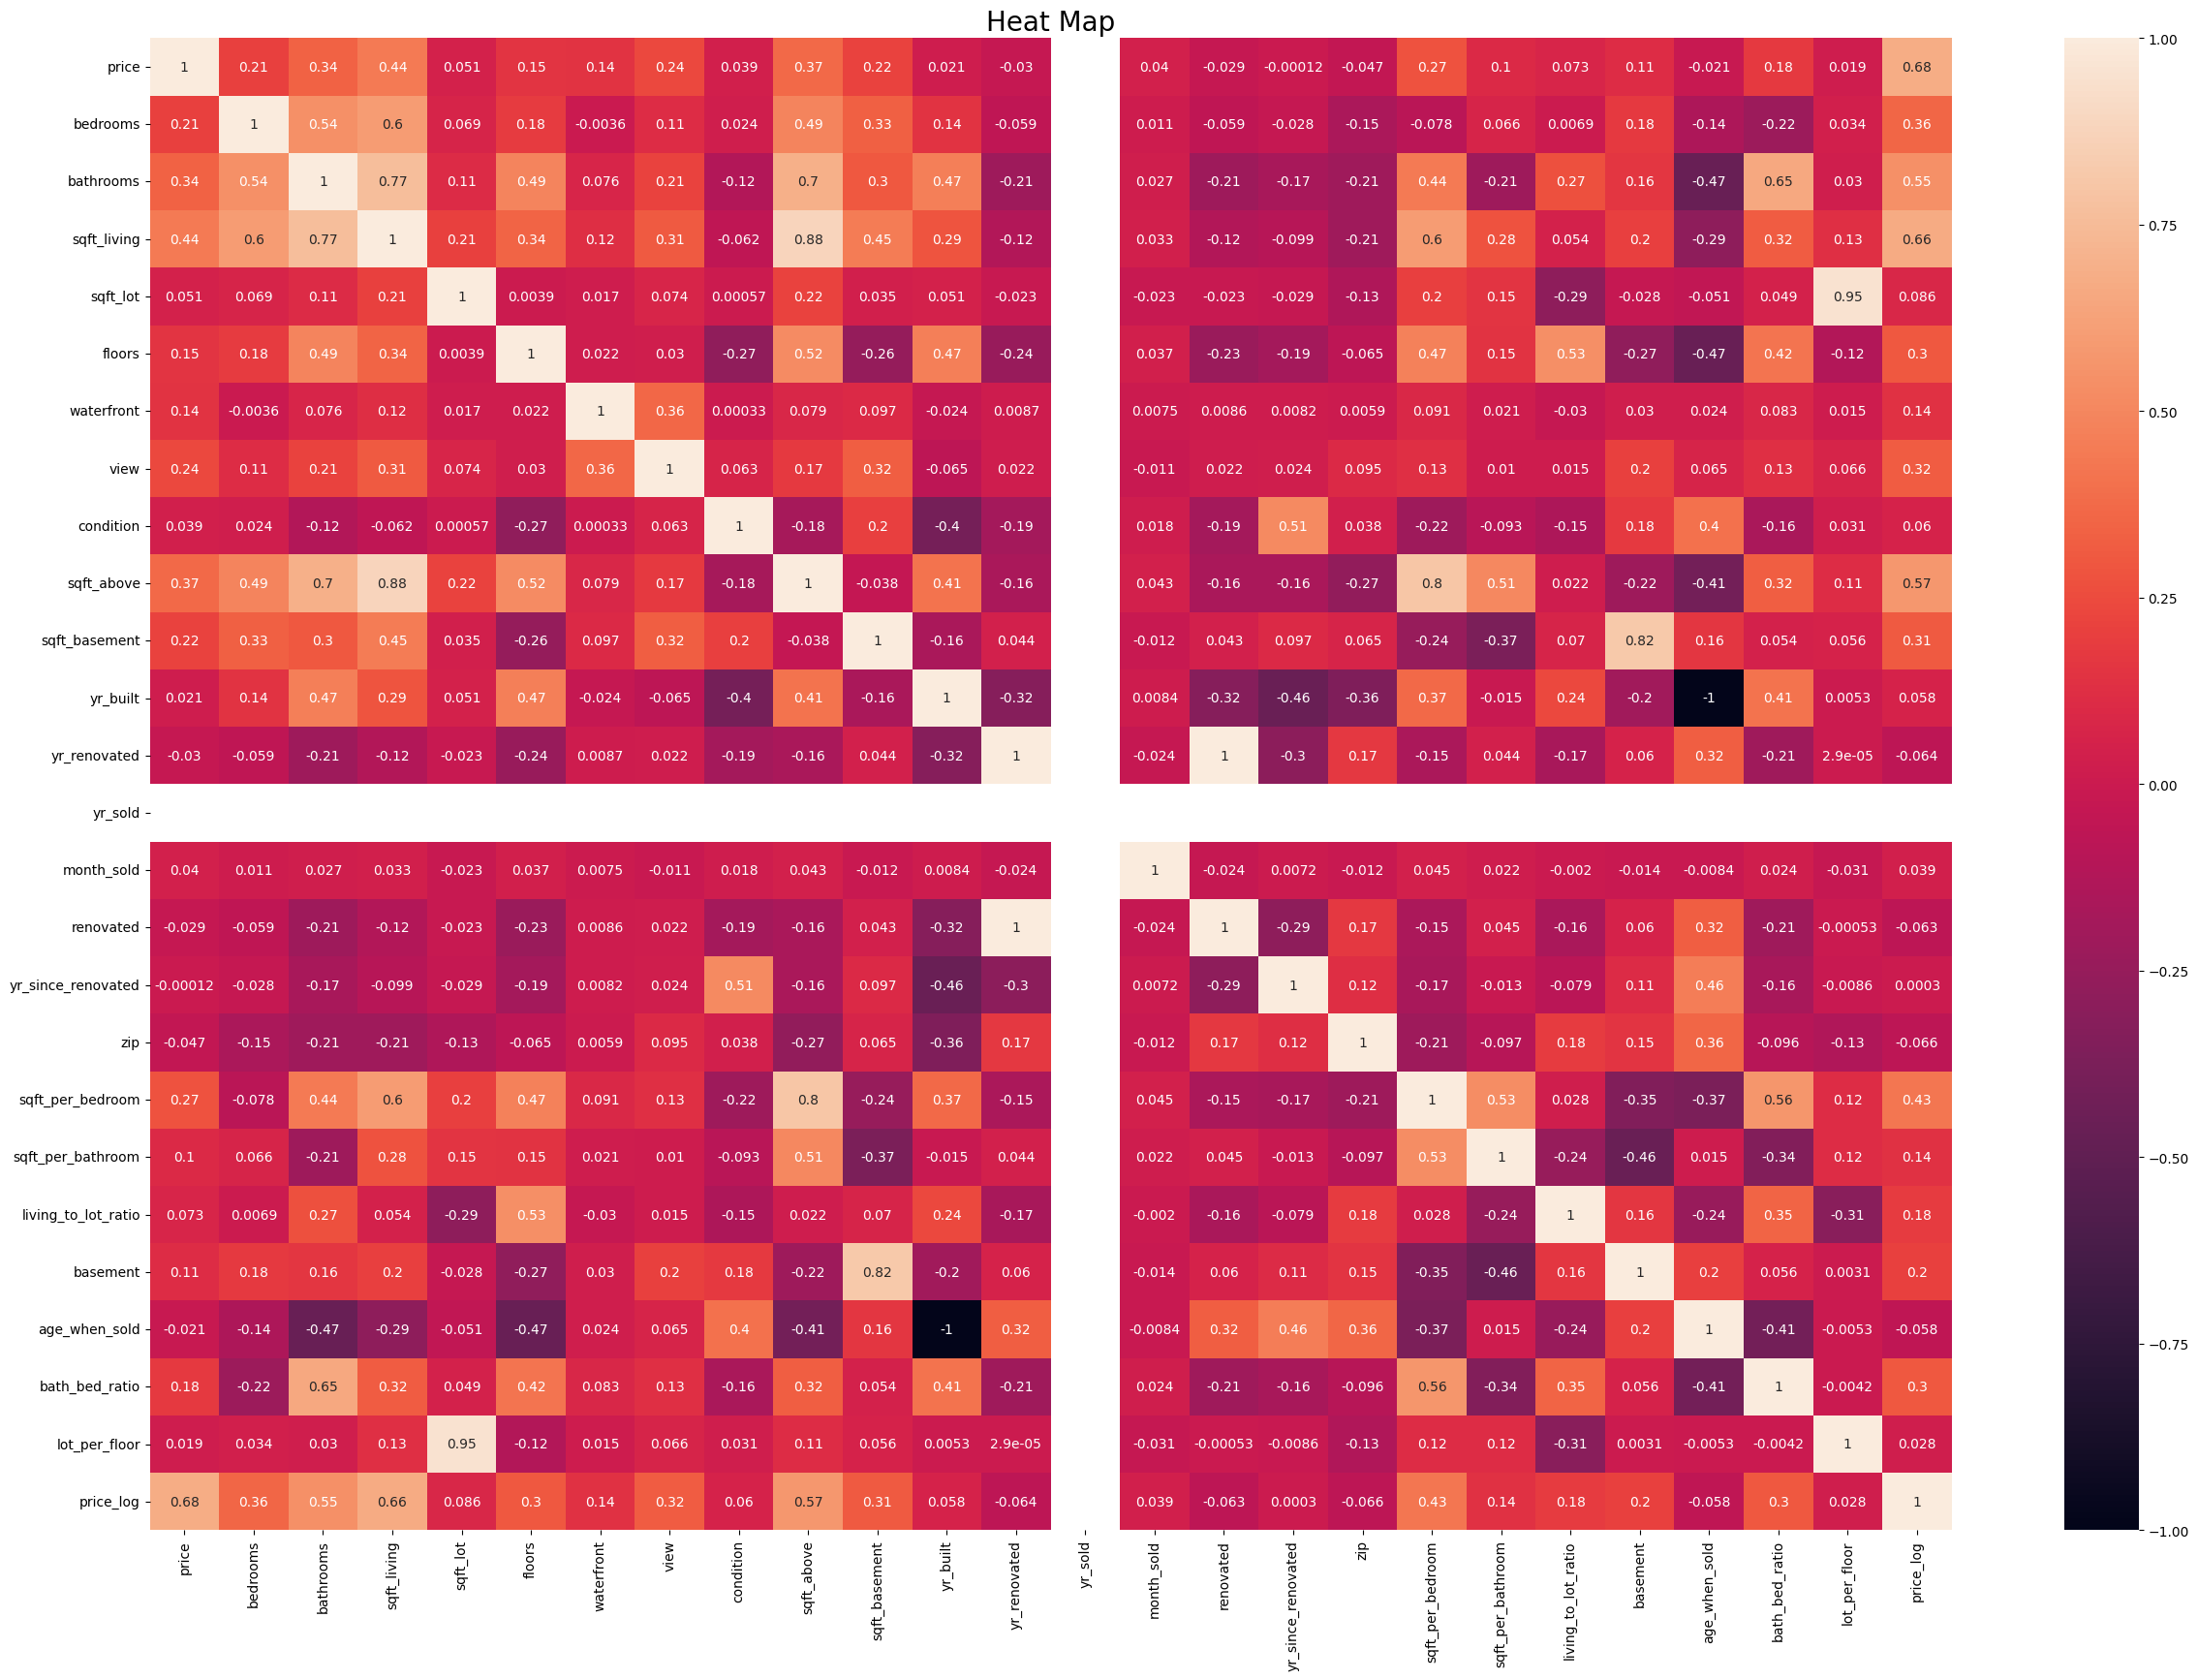

In [25]:
# วาด heatmap ดู Correlation
plt.figure(figsize=(30, 20))
sns.heatmap(df.corr(numeric_only=True), annot=True,)
plt.title('Heat Map', size=20)
plt.yticks(rotation = 0)
plt.show()

ดูความสัมพันธ์และเกี่ยวข้องกันระหว่าง Feature เป็นในลักษณะ heatmap โดย scale จะเป็น -1 ถึง 1 โดย:
- ยิ่งใกล้ +1 → ความสัมพันธ์เชิงบวกสูง
- ยิ่งใกล้ –1 → ความสัมพันธ์เชิงลบสูง
- ใกล้ 0 → แทบไม่มีความสัมพันธ์

แต่อันที่สำคัญที่สุดคือเทียบกับ target เพราะฉะนั้นมาเทียบกับ price_log ดีกว่า

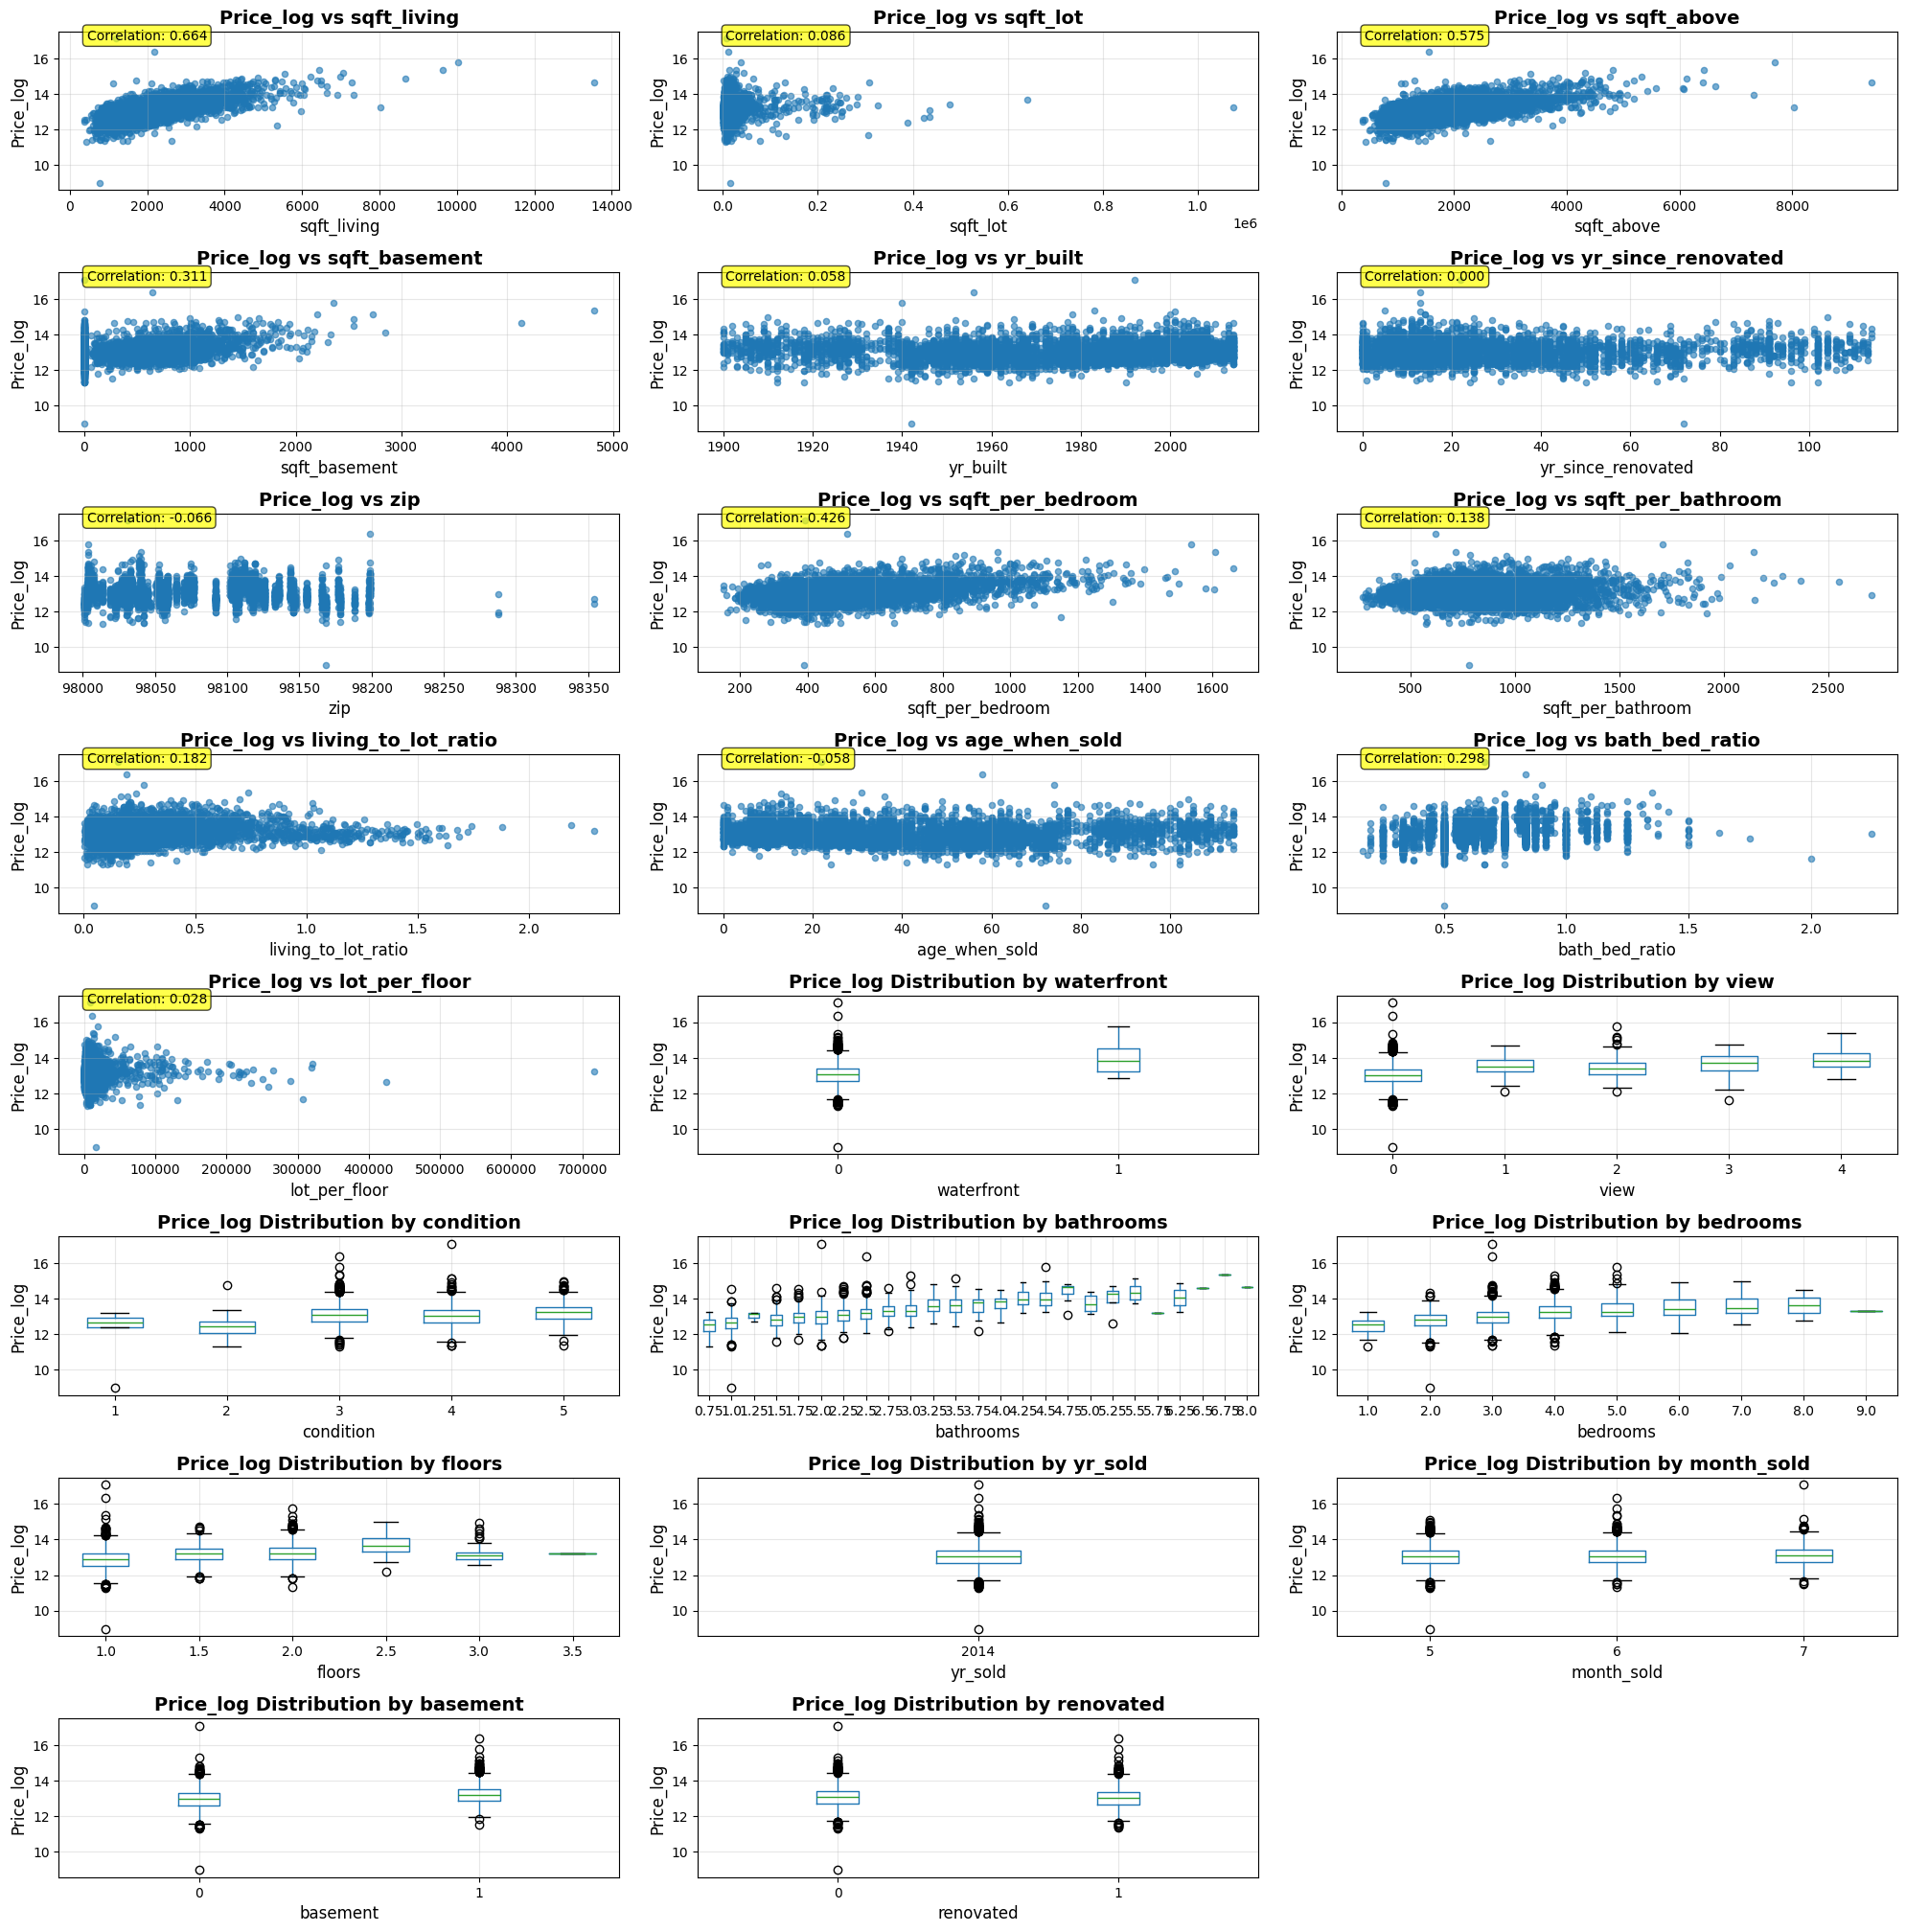

In [26]:
# Plot เทียบความสัมพันธ์ feature กับ target(price_log)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig, axes = plt.subplots(12, 3, figsize=(20, 30))
fig.suptitle('Price_log vs Features Comparison', fontsize=20, fontweight='bold')

# ปรับ axes ให้เรียงเป็นลิสต์เดียว
axes = axes.flatten()

# List of features ที่อยากจะเทียบกับ target(price_log) อันนี้เราจะดูข้อมูล continuous numerical ไม่เอา discrete
features_to_plot = [
    'sqft_living', 'sqft_lot', 
    'sqft_above', 'sqft_basement', 
    'yr_built', 'yr_since_renovated','zip',
    'sqft_per_bedroom', 'sqft_per_bathroom','living_to_lot_ratio',
    'age_when_sold', 'bath_bed_ratio', 'lot_per_floor'
]

# Plot ให้เป็น scatter
for i, feature in enumerate(features_to_plot):
    if i < len(axes):
        # สร้าง scatter plot
        axes[i].scatter(df[feature], df['price_log'], alpha=0.6, s=20)
        axes[i].set_xlabel(feature, fontsize=12)
        axes[i].set_ylabel('Price_log', fontsize=12)
        axes[i].set_title(f'Price_log vs {feature}', fontsize=14, fontweight='bold')
        axes[i].grid(True, alpha=0.3)
        
        # เพิ่ม correlation coefficient
        corr = df[feature].corr(df['price_log'])
        axes[i].text(0.05, 0.95, f'Correlation: {corr:.3f}', 
                    transform=axes[i].transAxes, fontsize=10,
                    bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

# Plot categorical features ให้เป็น box plots 
categorical_features = [
    'waterfront', 'view', 'condition', 'bathrooms','bedrooms', 'floors',
    'yr_sold', 'month_sold',
    'basement','renovated'
    ]

for i, feature in enumerate(categorical_features):
    ax_idx = len(features_to_plot) + i
    if ax_idx < len(axes):
        # สร้าง box plot
        df.boxplot(column='price_log', by=feature, ax=axes[ax_idx])
        axes[ax_idx].set_xlabel(feature, fontsize=12)
        axes[ax_idx].set_ylabel('Price_log', fontsize=12)
        axes[ax_idx].set_title(f'Price_log Distribution by {feature}', fontsize=14, fontweight='bold')
        axes[ax_idx].grid(True, alpha=0.3)
    plt.suptitle("")

# ซ่อนช่องกราฟที่ไม่ได้ใช้
for i in range(len(features_to_plot) + len(categorical_features), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()


In [27]:
#yr_sold แปลกๆ ลองเช็คดีกว่า 
df.yr_sold.value_counts()

yr_sold
2014    4598
Name: count, dtype: int64

มันเหมือนกันหมดเลย ปีที่ขาย เดี๋ยวค่อย drop เอา feature ไม่น่าได้ใช้

In [28]:
# มา check column อีกรอบ
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4598 entries, 0 to 4599
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 4598 non-null   datetime64[ns]
 1   price                4598 non-null   float64       
 2   bedrooms             4598 non-null   float64       
 3   bathrooms            4598 non-null   float64       
 4   sqft_living          4598 non-null   int64         
 5   sqft_lot             4598 non-null   int64         
 6   floors               4598 non-null   float64       
 7   waterfront           4598 non-null   int64         
 8   view                 4598 non-null   int64         
 9   condition            4598 non-null   int64         
 10  sqft_above           4598 non-null   int64         
 11  sqft_basement        4598 non-null   int64         
 12  yr_built             4598 non-null   int64         
 13  yr_renovated         4598 non-null   i

In [29]:
# Drop columns ที่ไม่มีประโยชน์ต่อ model เรา
to_drop = ["country","street","date","yr_sold","yr_renovated","statezip"]
df = df.drop(columns=[c for c in to_drop if c in df.columns])

ที่เราเอา columns ข้างบนแต่ละตัวออกเพราะว่า:
- country: dataset นี้มันมีแต่ USA อ่ะ เหมือนกันทุกอัน ไม่มีประโยชน์
- street: ข้อมูล string ละเอียดย่อยเกิน ถ้าเกิดสมมติเรา encode แบบ onehot ข้อมูลจะซอยยิกๆเกิน ไม่เกิดประโยชน์กับโมเดลและไม่ได้ช่วยให้โมเดลทำนายอะไรดีขึ้น high cardinality feature (หลายหมื่นค่าที่ไม่ซ้ำ)
- date: โมเดลจะมองเป็นตัวเลข timestamp (ไม่รู้ว่ามันคือปี/เดือน) → เสี่ยง overfit และไม่ตีความได้ตรงตัว รวมไปถึงเราเอาไปทำพวก month_sold แล้วใช้ประโยชน์จากตรงนั้นดีกว่า
- yr_sold: ข้อมูลนี้มันดันขายปีเดียวกันหมดเลยคือ 2014 เลยเป็น column ที่ทำมาคำนวณหา age when sold เฉยๆ
- yr_renovated: เราได้แปลงข้อมูลนี้ไปเป็น renovated (0/1) และ yr_since_renovated แล้ว ไม่จำเป็น
- statezip: เราได้แยกเอา zip (เลขรหัสจริง ๆ) ไปใช้แล้ว → ค่านี้เลยซ้ำซ้อนและ encode ยาก



## Train/Test/Evaluate Model

ถึงเวลาทำ model กันแล้ว อย่างแรกเลยคือ เราก็ต้องแยกระหว่าง X(feature) กับ y(target) กันก่อน

โดยปกติแล้ว process รวมๆของการ train model ก็มีเอา dataset มา split เป็น train set กับ test set

เพื่ออันนั้นจะเอาใช้สอน model แล้วอันนึงเป็นตัวทดสอบสำหรับวัดผล model ของเรา จากนั้นก็ train model ให้เหมาะกับโจทย์เราและปรับ hyperparameter ให้เหมาะสม

แล้วก็ test หา Evaluation ในการประเมิณผล แบบ RMSE, R-squared เป็นต้น

แต่บางทีเราอาจจะอยากจะทำอะไรเพิ่มเติมด้วย เช่นทำ [Gradient Descent](https://medium.com/mmp-li/gradient-descent-%E0%B8%84%E0%B8%B5%E0%B8%A2%E0%B9%8C%E0%B9%80%E0%B8%A7%E0%B8%B4%E0%B8%A3%E0%B9%8C%E0%B8%94%E0%B8%97%E0%B8%B5%E0%B9%88-data-science-%E0%B8%95%E0%B9%89%E0%B8%AD%E0%B8%87%E0%B8%A3%E0%B8%B9%E0%B9%89%E0%B8%88%E0%B8%B1%E0%B8%81-machine-learning-101-b5c78c1787a0) หา cost-function ให้ต่ำเพื่อให้โมเดล Efficient ขึ้น

หรือในครั้งนี้ พี่ก็อยากที่จะกำจัด Outlier ใน Data เหมือนกัน แต่จะกำจัดหลัง split data train set เท่านั้น เพื่อป้องกัน [data leakage](https://apannawit.medium.com/data-leakage-%E0%B8%84%E0%B8%B7%E0%B8%AD%E0%B8%AD%E0%B8%B0%E0%B9%84%E0%B8%A3-%E0%B9%81%E0%B8%A5%E0%B8%B0%E0%B9%80%E0%B8%A3%E0%B8%B2%E0%B8%84%E0%B8%A7%E0%B8%A3%E0%B8%95%E0%B9%89%E0%B8%AD%E0%B8%87%E0%B8%88%E0%B8%B1%E0%B8%94%E0%B8%81%E0%B8%B2%E0%B8%A3%E0%B8%81%E0%B8%B1%E0%B8%9A%E0%B8%9B%E0%B8%B1%E0%B8%8D%E0%B8%AB%E0%B8%B2%E0%B8%99%E0%B8%B5%E0%B9%89%E0%B8%AD%E0%B8%A2%E0%B9%88%E0%B8%B2%E0%B8%87%E0%B9%84%E0%B8%A3-47593094cfe) ไม่อย่างงั้นคะแนนอาจจะเยอะเกินจริงและไม่ accurate ได้ แล้วข้อมูลก็จะเอามา Scale ด้วย [Robust Scaler](https://proclusacademy.com/blog/robust-scaler-outliers/) และ Encode str data ที่เหลือด้วย [OneHotEncoder](https://www.hitexts.com/data/one-hot-encoding/)

In [30]:
# -------------------------
# Define X, y
# -------------------------
X = df.drop(["price", "price_log"], axis=1) # price ก็ต้อง drop เพราะยังไม่ได้ drop ก่อนหน้านะรวมกับ target ด้วย
y = df["price_log"]

In [31]:
# Feature จะแบ่งเป็น 2 กลุ่ม คือ numeric กับ categorical
numeric_features = [c for c in X.columns if c != 'city']
city_feature = ['city'] if 'city' in X.columns else []

In [32]:
# Train/test split ก่อน Scale/Encode และก่อน remove outlier  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [33]:
# Z-score outlier removal on TRAIN set เท่านั้น
#    ไอเดีย: คำนวณ Z-score ที่คอลัมน์ตัวเลข แล้วตัดแถวที่ |z| > 4
z_numeric_cols = [
    c for c in X_train.columns
    if c not in ["city"]  # อย่า Z-score กับ Categorical data
]

# คำนวณ mean/std จาก train เท่านั้น
train_num = X_train[z_numeric_cols].astype(float).copy()
mu = train_num.mean()
sigma = train_num.std(ddof=0).replace(0, np.nan)

# Z = (x - mu) / sigma
Z = (train_num - mu) / sigma

# เกณฑ์ outlier (ลองปรับตัวเลขได้ยิ่งเยอะขึ้น ยิ่ง conservative มากขึ้น หมายถึงจุดต้องแยกแบบโดดเดี่ยวจริงๆ)
threshold = 4
keep_mask = (Z.abs() <= threshold).all(axis=1)

# ลบเฉพาะใน train
X_train_z = X_train.loc[keep_mask].copy()
y_train_z = y_train.loc[keep_mask].copy()

Outlier detection ที่เราใช้เอาสิ่งแปลกปลอมออกคือ [Z-score](https://medium.com/@datasciencejourney100_83560/z-score-to-identify-and-remove-outliers-c17382a4a739) ไปลองอ่านลายระเอียดได้

In [34]:
# ทำเป็น Pipleline ถ้าข้อมูลเป็น numeric จะ RobustScaler และ categorical จะ OneHotEncoder
ct = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numeric_features),
        ('city_ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False), city_feature),
    ],
    remainder='drop'
)

In [35]:
# Encode พวก Feature
X_train_t = ct.fit_transform(X_train_z)
X_test_t  = ct.transform(X_test)

In [36]:
#กำหนด model

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1),
    "XGBoost": XGBRegressor(n_estimators=1000, learning_rate=0.03, max_depth=5, min_child_weight= 3, subsample= 0.9, random_state=42, n_jobs=-1),
    "GradientBoosting": GradientBoostingRegressor(
        n_estimators=1000, learning_rate=0.03, max_depth=5, subsample= 0.9, random_state=42
    ),
}

Model ที่เลือกจะเป็นตัวที่ใช้ในโจทย์ Regression ของเรา โดยเลือกมา 5 ตัวคือ:
- Linear Regression
- Ridge Regression
- Random Forest
- XGBoost
- GradientBoosting

In [55]:
# Train และ Evaluate
from joblib import dump
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
results = []
for name, model in models.items():
    model.fit(X_train_t, y_train_z)
    y_pred = model.predict(X_test_t)
    y_pred_price = np.expm1(y_pred)  # กลับจาก log1p → ราคา
    y_test_price = np.expm1(y_test)   # ถ้า y_test เป็น log เช่นกัน
    rmse = np.sqrt(mean_squared_error(y_test_price, y_pred_price))
    mae  = mean_absolute_error(y_test_price, y_pred_price)
    r2   = r2_score(y_test_price, y_pred_price)
    #save model แต่ละ model
    dump(model, f"house_price_{name}_pipeline.joblib")
    results.append({"Model": name, "RMSE": rmse, "MAE": mae, "R2": r2})



In [56]:
#แสดงผลลัพธ์
results_df = pd.DataFrame(results).sort_values(by="RMSE").reset_index(drop=True)
print(results_df.to_string(index=False))

            Model          RMSE           MAE       R2
          XGBoost 162810.795477  87571.744636 0.736325
 GradientBoosting 165556.859670  89048.564484 0.727355
    Random Forest 177564.928109  99658.774772 0.686370
Linear Regression 186308.926332 104870.840707 0.654721
 Ridge Regression 187469.226694 105105.963430 0.650407


จะเห็นว่าผลลัพธ์ที่ได้ คะแนนก็ไม่ได้เยอะมาก แต่ก็เพราะเรากัน case data leakage ด้วย (หลายคนติดนิสัย Encode/Scale ก่อน split เพราะมันสะดวกดี) แล้วก็ไม่ให้มัน overfit จริงๆก็สามารถทำให้คะแนนสูงกว่านี้ได้ อย่าง Feature Engineering เพิ่ม ไป tune hyperparameter ให้ดีกว่านี้ เป็นต้น ไปลองดูกันได้

## Application

ต่อไปเราจะต้องสามารถนำ model ที่ train ไปใช้งานจริงได้ กรณีนี้พี่จะทำ pipline feature Engineering เพราะอย่าลืมว่า Columns เราเปลี่ยนไปเยอะจากตอนแรก เพราะฉะนั้น input จะต้องเป็นอันเดิม แต่ model เราจะต้อง pre-process ในตัวมันเองให้เหมือนตอน train ก็จะพ่น output ออกมาเป็น price ที่ไม่ได้ logarithm ด้วย (exponential คืน)

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

# เอาทื้ feature engineering มาทำเป็น class ยัดใส้ใน pipeline
class FeatureEngineer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.copy()

        # Date input หน้าตาอันนี้ "2/5/2014  0:00:00"
        X["date"] = pd.to_datetime(X["date"], errors="coerce")

        # --- Feature Engineering ---
        X["yr_sold"] = X["date"].dt.year
        X["month_sold"] = X["date"].dt.month

        X["renovated"] = np.where(X["yr_renovated"].fillna(0) == 0, 0, 1)
        X["yr_since_renovated"] = np.where(
            X["yr_renovated"].fillna(0) == 0,
            X["yr_sold"] - X["yr_built"],
            X["yr_sold"] - X["yr_renovated"]
        )

        if "statezip" in X.columns:
            z = X["statezip"].astype("string").str.split().str[-1]
            X["zip"] = pd.to_numeric(z, errors="coerce")

        X["sqft_per_bedroom"] = X["sqft_above"] / X["bedrooms"].replace(0, np.nan)
        X["sqft_per_bathroom"] = X["sqft_above"] / X["bathrooms"].replace(0, np.nan)
        X["living_to_lot_ratio"] = X["sqft_living"] / X["sqft_lot"].replace(0, np.nan)
        X["basement"] = (X["sqft_basement"] > 0).astype(int)
        X["age_when_sold"] = X["yr_sold"] - X["yr_built"]
        X["bath_bed_ratio"] = X["bathrooms"] / X["bedrooms"].replace(0, np.nan)
        X["lot_per_floor"] = X["sqft_lot"] / X["floors"].replace(0, np.nan)

        # Drop columns
        to_drop = ["country","street","date","yr_sold","yr_renovated","statezip"]
        X = X.drop(columns=[c for c in to_drop if c in X.columns], errors="ignore")
        X = X.replace([np.inf, -np.inf], np.nan)
        X = X.dropna()

        return X

In [ ]:
# directory model
model_path = "house_price_XGBoost_pipeline.joblib"

In [ ]:
# load model ที่ save ไว้
from joblib import load
xgb_model = load(model_path)

In [47]:
xgb_model

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [ ]:
# Pipeline ใส่ Class อันปะกี้ ใส่ preprocess ก่อนที่ใช้ทำ encode/scale แล้วก็ model ที่เรา load ไว้

serve = Pipeline([
    ("fe", FeatureEngineer()),
    ("prep", ct),
    ("model", xgb_model)
])

In [ ]:
# ลอง input ข้อมูลมาใหม่ดู
raw = pd.DataFrame([{
    "date": "2/5/2014  0:00:00", "bedrooms":3, "bathrooms":2, "floors":1,
    "sqft_living":1800, "sqft_lot":5000, "sqft_above":1600, "sqft_basement":200,
    "yr_built":1995, "yr_renovated":0, "street":"123 6th Ave", "city":"Seattle",
    "statezip":"WA 98103", "country":"USA", "waterfront":0, "view":1, "condition":3
}])

In [ ]:
# ลอง predict ดู
pred = serve.predict(raw)
y_pred_price = np.expm1(pred)
print(y_pred_price)

[620476.4]


## What next?

เราจะต้องแปะ Code ลงใน Github repo ของตัวเองเพื่อส่งงานพร้อมกับเขียน Comment มา (part ไหนทำอะไรได้บ้าง แต่ไม่ต้องระเอียดยิ๊บสอนแบบพี่ ไม่ต้องภาษาไทยก็ได้พี่แค่อธิบาย) และตัวใช้ทำนายเราอาจจะทำเป็น fastapi ก็ได้ หรืออาจจะทำเป็น GUI run localhost สวยๆแบบ streamlit ก็เห็นภาพง่ายดีเหมือนกัน แยกเป็นอีก code file py ไปเลยก็ได้ notebook อาจจะใช้ EDA train model และ save เฉยๆก็ได้ แล้วก็ขออภัยที่โค้ดมาช้าด้วยครับ 🙏

อย่าลืม pip freeze > requirements.txt เพื่อ save lib ที่ใช้ใน virtual environment ของเราไว้ด้วย